# Taiwanese stock volatility and normal distribution

In [1]:
import datetime as dt
dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

'2016-10-16 23:23:34'

In [2]:
cd ~/Development/pytwstock/

/home/zhxie/Development/pytwstock


In [3]:
%matplotlib inline
from twstock.twstockdb.TWStockDatabase import TWSECDB
twdb = TWSECDB("/d/StockDatabase/twsecdb.scdb")

In [4]:
stock_list = twdb.get_stock_list(stock_type='PO')
stock_list = [x[0] for x in stock_list]

In [5]:
import datetime as dt
total_foreign_shares = None
total_foreign_equitity = None
for stock_no in stock_list:
    f = twdb.query_taiwan_stock_foreign_holdings_time_series(stock_no)
    f = f['foreign_china_hold']
    f = f.fillna(0)
    prices = twdb.query_taiwan_stock_ohlcv_time_series(stock_no, from_date=dt.date(2004,2,11))
    close_price = prices['close']
    close_price = close_price.fillna(0)
    e = f*close_price
    if total_foreign_shares is None:
        total_foreign_shares = f
    else:
        total_foreign_shares = total_foreign_shares.add(f, fill_value=0)
    if total_foreign_equitity is None:
        total_foreign_equitity = e
    else:
        total_foreign_equitity = total_foreign_equitity.add(e, fill_value=0)

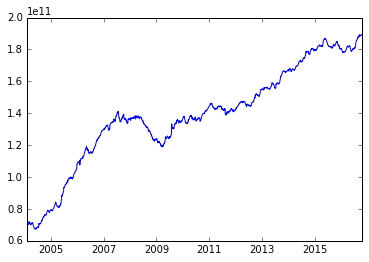

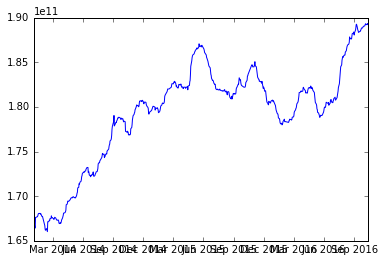

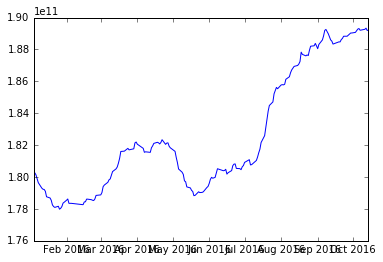

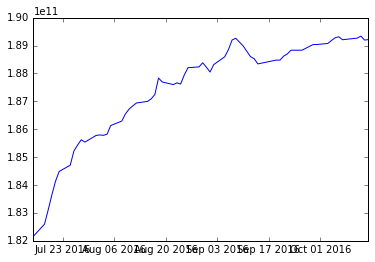

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(total_foreign_shares)
plt.figure()
plt.cla()
plt.plot(total_foreign_shares.ix[dt.date(2014,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_shares.ix[dt.date(2016,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_shares.ix[-62:])

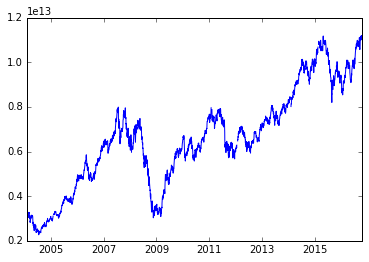

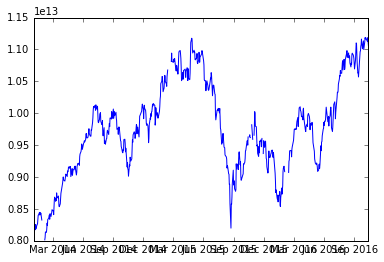

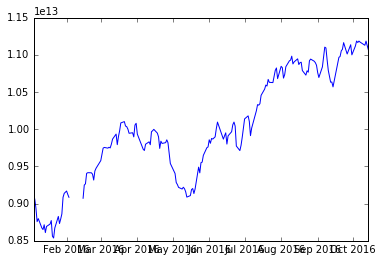

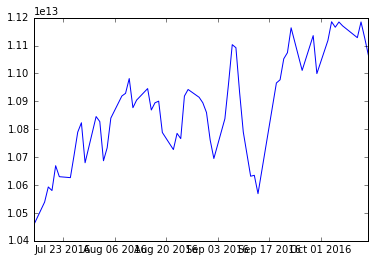

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(total_foreign_equitity)
plt.figure()
plt.cla()
plt.plot(total_foreign_equitity.ix[dt.date(2014,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_equitity.ix[dt.date(2016,1,1):])
plt.figure()
plt.cla()
plt.plot(total_foreign_equitity.ix[-62:])

In [9]:
tmp = total_foreign_shares.shift(1)
shift_foreign_shares = tmp.ix[1:]
foreign_shares_volatility = (total_foreign_shares.add(shift_foreign_shares*-1))/total_foreign_shares

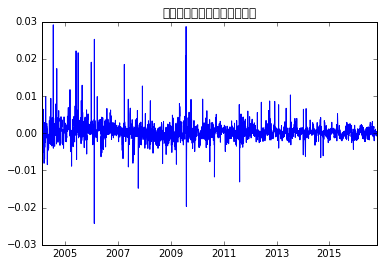

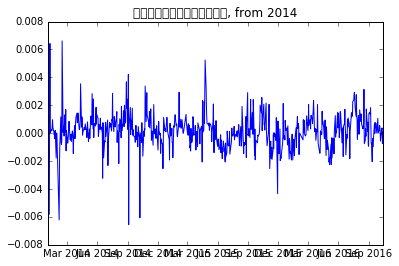

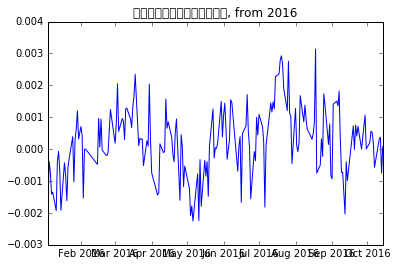

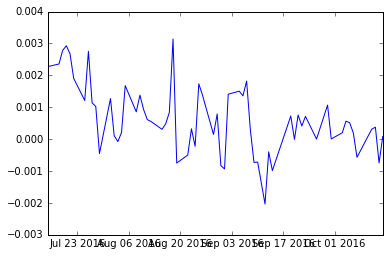

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(foreign_shares_volatility)
plt.title("外資持股相對前一天增減比例")
plt.figure()
plt.cla()
plt.plot(foreign_shares_volatility.ix[dt.date(2014,1,1):])
plt.title("外資持股相對前一天增減比例, from 2014")
plt.figure()
plt.cla()
plt.plot(foreign_shares_volatility.ix[dt.date(2016,1,1):])
plt.title("外資持股相對前一天增減比例, from 2016")
plt.figure()
plt.cla()
plt.plot(foreign_shares_volatility.ix[-62:])

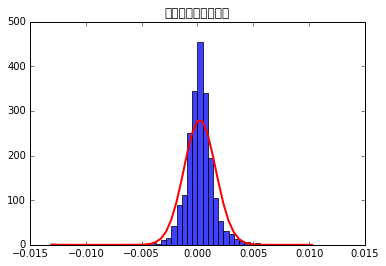

NormaltestResult(statistic=332.64880366640091, pvalue=5.8375428028659975e-73)

In [11]:
import matplotlib.mlab as mlab
import scipy.stats as stats
n, bins, patches = plt.hist(foreign_shares_volatility.ix[-1500:], 50, normed=1, facecolor='blue', alpha=0.75)
sigma = foreign_shares_volatility.ix[-1500:].std() 
mu = foreign_shares_volatility.ix[-1500:].mean() 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
plt.title("外資持股變化率分佈")
plt.show()
stats.normaltest(foreign_shares_volatility.ix[-1500:])

In [12]:
tmp = total_foreign_equitity.shift(1)
shifted_foreign_equitity = tmp.ix[1:]
foreign_equitity_volatility = (total_foreign_equitity.add(shifted_foreign_equitity*-1))/total_foreign_equitity

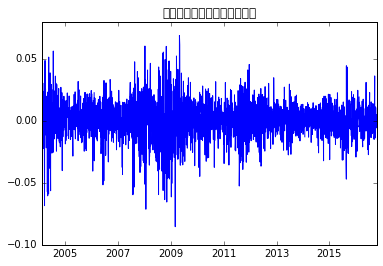

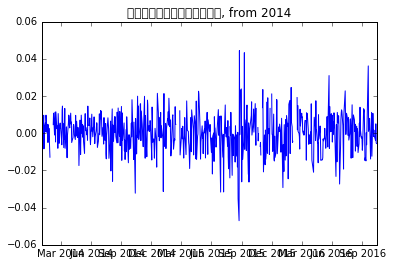

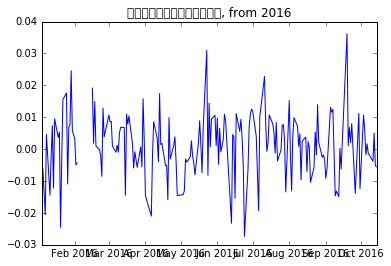

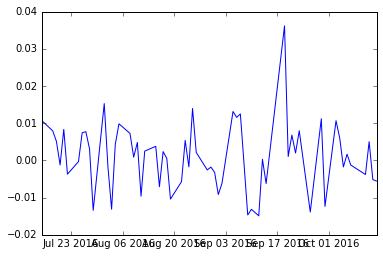

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(foreign_equitity_volatility)
plt.title("外資淨值相對前一天增減比例")
plt.figure()
plt.cla()
plt.plot(foreign_equitity_volatility.ix[dt.date(2014,1,1):])
plt.title("外資淨值相對前一天增減比例, from 2014")
plt.figure()
plt.cla()
plt.plot(foreign_equitity_volatility.ix[dt.date(2016,1,1):])
plt.title("外資淨值相對前一天增減比例, from 2016")
plt.figure()
plt.cla()
plt.plot(foreign_equitity_volatility.ix[-62:])

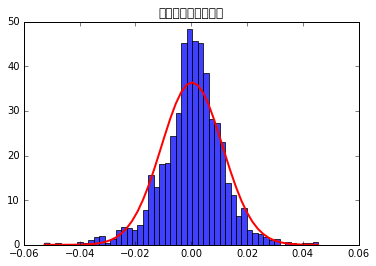

NormaltestResult(statistic=84.52305231241192, pvalue=4.4264176971329024e-19)

In [14]:
foreign_equitity_volatility = foreign_equitity_volatility.fillna(0)
n, bins, patches = plt.hist(foreign_equitity_volatility.ix[-1500:], 50, normed=1, facecolor='blue', alpha=0.75)
sigma = foreign_equitity_volatility.ix[-1500:].std() 
mu = foreign_equitity_volatility.ix[-1500:].mean() 
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
plt.title("外資持股變化率分佈")
plt.show()
stats.normaltest(foreign_equitity_volatility.ix[-1500:])